# Segmentation 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/'My Drive'/Code/ImagesProcessing

/content/drive/My Drive/Code/ImagesProcessing


In [ ]:
ls

'Assignment5 _solution.ipynb'           images_test/
 BasicProcessing.ipynb                  IoU.ipynb
 Bk2017_gray.jpg                        Moments.ipynb
 BTT1_Oanh.ipynb                        PersonImages/
 Canny.ipynb                            plot_morphology.ipynb
 Convolution.ipynb                      ReadImages.ipynb
 Day7_Object_Detection_solution.ipynb   res.png
 Edge_detection.ipynb                   Segmentation.ipynb
 Histogram.ipynb                        Shape-dataset/
 HOG-extractor.ipynb                    shapeMatcher.py
 HuMoments.py                           SS_Course_Day1.ipynb
 ImageRetrieval.ipynb                   Wang/
 images/                                Week_2_Point_operations.ipynb


In [3]:
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
import cv2
import numpy as np
import sys
print(cv2.__version__)

4.1.2


Threshold

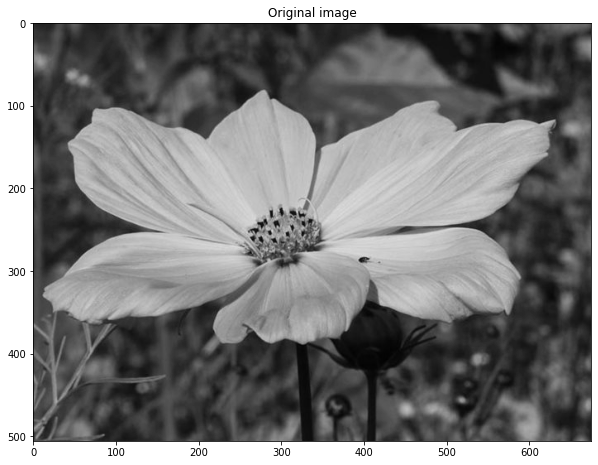

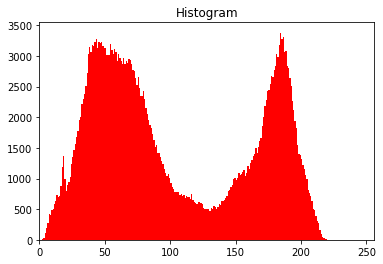

127.0


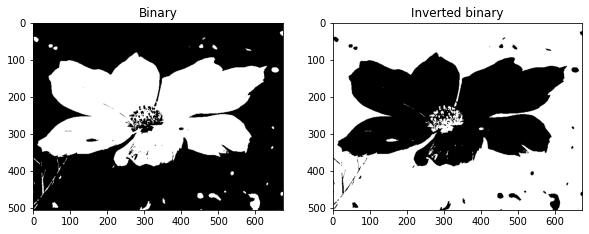

In [ ]:
#read image
def cm_to_inch(value):
    return value/2.54
img=cv2.imread('images/flower.jpg',0)
plt.figure(figsize = (10,10))
plt.imshow(img,cmap='gray', vmin=0, vmax=255)
plt.gca().set_title('Original image')
plt.show()
#Compute histogram
hist,bins = np.histogram(img.flatten(),256,[0,256])
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.gca().set_title('Histogram')
plt.show()
#plt.savefig("images/histogram_flower_gray.jpg")
plt.figure(figsize=(cm_to_inch(25),cm_to_inch(10)))
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
plt.subplot(121)
plt.gca().set_title('Binary')
plt.imshow(thresh1,cmap='gray', vmin=0, vmax=255)
print (ret)
plt.subplot(122)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
plt.gca().set_title('Inverted binary') 
plt.imshow(thresh2,cmap='gray', vmin=0, vmax=255)
plt.savefig("images/thresholded_image.jpg")

Đoạn chương trình thêm nhiễu vào trong ảnh

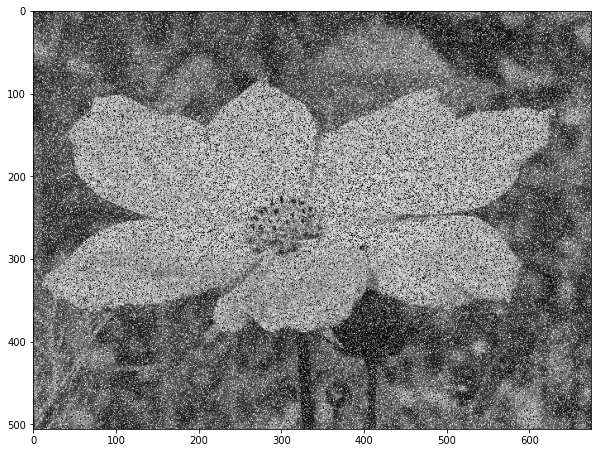

In [ ]:
#Add noise with mean and standard to image
mean=0
std=100
img = cv2.imread('images/flower.jpg',0)
images = []
img1 = img.copy() 
cv2.randn(img1,mean, std)
images=img1+img;
cv2.imwrite('images/flower_noise.jpg', images)
plt.figure(figsize = (10,10))
plt.imshow(images,cmap='gray', vmin=0, vmax=255)
plt.show()

Kiểm tra vai trò của lọc nhiễu trước khi áp dụng phân vùng dựa trên ngưỡng

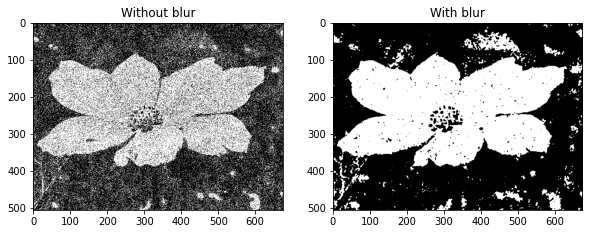

In [ ]:
img=cv2.imread('images/flower_noise.jpg')
blur = cv2.GaussianBlur(img,(7,7),0)
ret, thres = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret, thres_blur = cv2.threshold(blur,127,255,cv2.THRESH_BINARY)
plt.figure(figsize=(cm_to_inch(25),cm_to_inch(10)))
plt.subplot(121)
plt.gca().set_title('Without blur')
plt.imshow(thres,cmap='gray', vmin=0, vmax=255)
plt.subplot(122)
plt.gca().set_title('With blur')
plt.imshow(thres_blur,cmap='gray', vmin=0, vmax=255)
plt.savefig("images/thresholded_blur.jpg")

Phân vùng dựa trên Otsu

In [ ]:
def Otsu(path):
  img=cv2.imread(path,0)
  blur = cv2.GaussianBlur(img,(5,5),0)
  # find normalized_histogram, and its cumulative distribution function
  hist = cv2.calcHist([blur],[0],None,[256],[0,256])
  hist_norm = hist.ravel()/hist.sum()
  Q = hist_norm.cumsum()
  bins = np.arange(256)
  fn_min = np.inf
  thresh = -1
  for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    if q1 < 1.e-6 or q2 < 1.e-6:
        continue
    b1,b2 = np.hsplit(bins,[i]) # weights
    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i
  return thresh

Defined by function: 117 and by OpenCV: 116.0


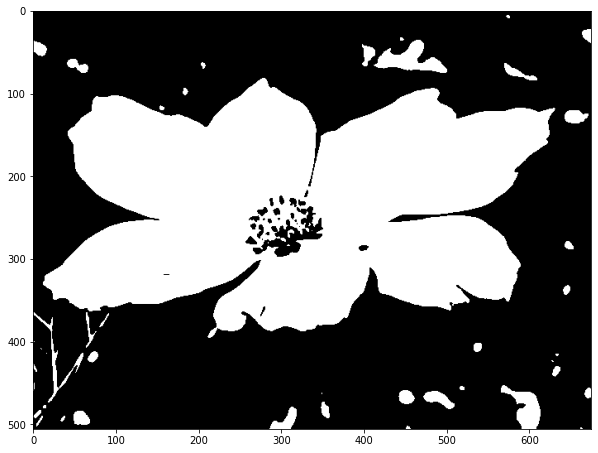

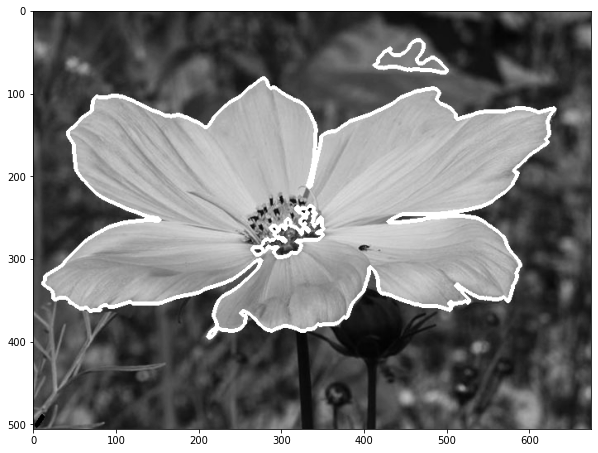

In [ ]:
thresh=Otsu('images/flower.jpg')
# find otsu's threshold value with OpenCV function
img=cv2.imread('images/flower.jpg',0)
blur = cv2.GaussianBlur(img,(5,5),0)
ret, otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print( "Defined by function: {} and by OpenCV: {}".format(thresh,ret) )
plt.figure(figsize = (10,10))
plt.imshow(otsu,cmap='gray', vmin=0, vmax=255)
plt.show()
contours,hierarchy = cv2.findContours(otsu, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for i, c in enumerate(contours):
    area = cv2.contourArea(c)
    if area > 1500:
        cv2.drawContours(img, contours, i, (255, 0, 0), 3)
cv2.drawContours(img, contours, 3, (0,255,0), 3)
plt.figure(figsize = (10,10))
plt.imshow(img,cmap='gray', vmin=0, vmax=255)
plt.show()